# Water pump data predictions

## Group:
    
- Isaac Gonzales Vizcarra
- Ibrahim Sobh
- Anthony Siampiringue


## Dataset:
    https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
        
## Description:
- Data driven prediction models of water pump sensor.

## Anomalies:
- Detect atypical peak when compared to surrounding past measurements that are lower. 
- Detect RECOVERING and BROKEN status         

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
data = pd.read_csv("../dataset/sensor.csv", parse_dates=["timestamp"], index_col="timestamp")
data_df = data.copy()
data_df.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
data_df.drop(columns=['Unnamed: 0', 'sensor_15'], inplace=True)

## Pump nomalies

In [4]:
data_df["machine_status"].value_counts()


NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

encod = LabelEncoder()
encod.fit(data_df['machine_status'])

data_df_encod_t = data_df.copy()
data_df_encod = data_df_encod_t.drop(columns=['machine_status'])
data_df_encod_labels = encod.transform(data_df['machine_status'])


In [6]:
encod.inverse_transform([0,1,2])

array(['BROKEN', 'NORMAL', 'RECOVERING'], dtype=object)

In [7]:
data_df_encod['machine_status'] = data_df_encod_labels

#Remplace nan values
data_df_encod = data_df_encod.bfill()

# Sensors - outliers of samples

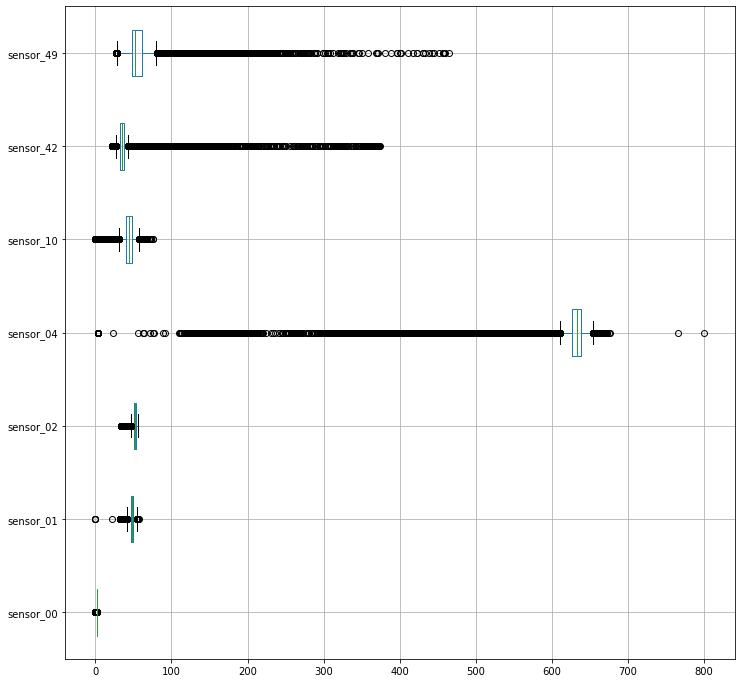

In [8]:
plt.figure(figsize=(12,12))
data_df_encod[["sensor_00", "sensor_01", 
               "sensor_02", "sensor_04",
               "sensor_10", "sensor_42", 
               "sensor_49"]].boxplot(vert=False);

In [9]:
from hmmlearn import hmm    
from utils.detection_results import *

def gaussian_hmm(data_df_encod, sensor):
    x_sensor = (data_df_encod[sensor].values).reshape(-1, 1)
  
    model = hmm.GaussianHMM(n_components = 5, covariance_type = "diag", 
                                n_iter = 100, random_state = 42)
    model.fit(x_sensor)
    y_predicted = model.predict(x_sensor)
    
    n_0 = (y_predicted==0).sum()
    n_1 = (y_predicted==1).sum()
    n_2 = (y_predicted==2).sum()
    n_3 = (y_predicted==3).sum()
    n_4 = (y_predicted==4).sum()
    
    min_index = np.argmin(np.array([n_0, n_1, n_2, n_3, n_4]))
    outlier_label = min_index
    normal_label = -1
    y_predicted[y_predicted!=min_index] = -1
        
    states = pd.unique(y_predicted)
    y_predicted[y_predicted>-1] = 1
    y_predicted[y_predicted==-1] = 0
    outlier_label = 1
    normal_label = 0
        
    return outlier_label, normal_label, y_predicted



Sensor: sensor_00


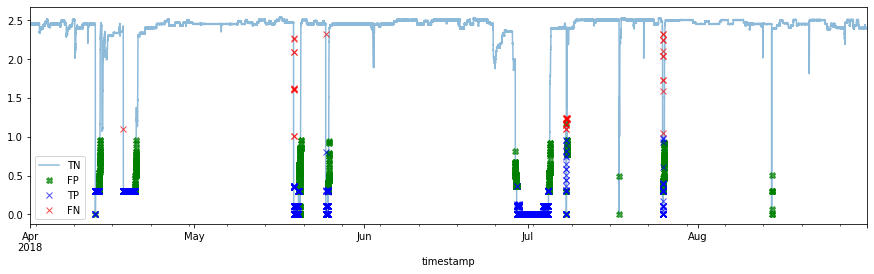

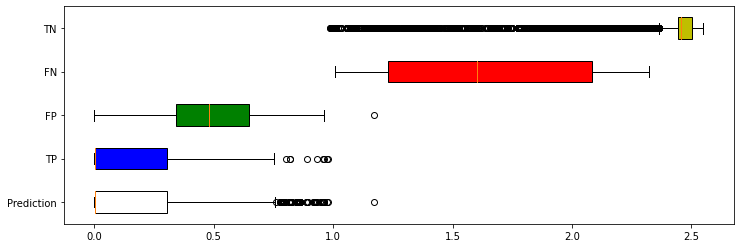

Anomalies: 14484
Anomalies by Algorithm : 220282
% Anomalies detected: 99.74%
False Positive Rate: 1.17
False Negative Rate: 0.26
Accuracy: 98.89
F1 Score: 92.21
Recall: 99.74
Precision: 85.73

[[203432   2404]
 [    38  14446]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    205836
           1       0.86      1.00      0.92     14484

    accuracy                           0.99    220320
   macro avg       0.93      0.99      0.96    220320
weighted avg       0.99      0.99      0.99    220320

--------------------
Sensor: sensor_01


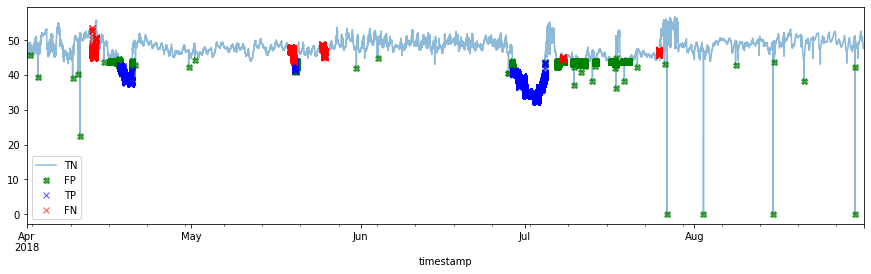

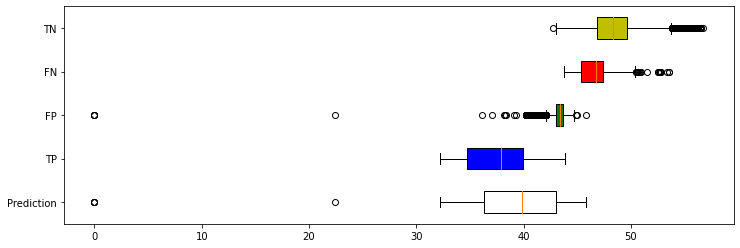

Anomalies: 14484
Anomalies by Algorithm : 217511
% Anomalies detected: 80.61%
False Positive Rate: 2.76
False Negative Rate: 19.39
Accuracy: 96.15
F1 Score: 73.35
Recall: 80.61
Precision: 67.29

[[200162   5674]
 [  2809  11675]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    205836
           1       0.67      0.81      0.73     14484

    accuracy                           0.96    220320
   macro avg       0.83      0.89      0.86    220320
weighted avg       0.97      0.96      0.96    220320

--------------------
Sensor: sensor_02


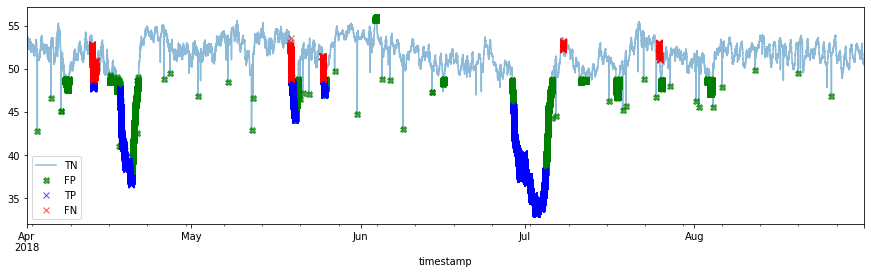

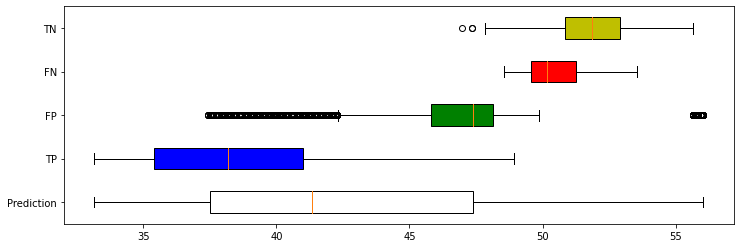

Anomalies: 14484
Anomalies by Algorithm : 219062
% Anomalies detected: 91.31%
False Positive Rate: 4.53
False Negative Rate: 8.69
Accuracy: 95.19
F1 Score: 71.41
Recall: 91.31
Precision: 58.63

[[196505   9331]
 [  1258  13226]]

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    205836
           1       0.59      0.91      0.71     14484

    accuracy                           0.95    220320
   macro avg       0.79      0.93      0.84    220320
weighted avg       0.97      0.95      0.96    220320

--------------------
Sensor: sensor_04


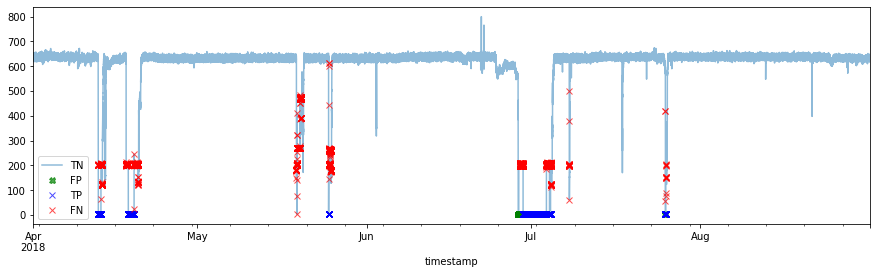

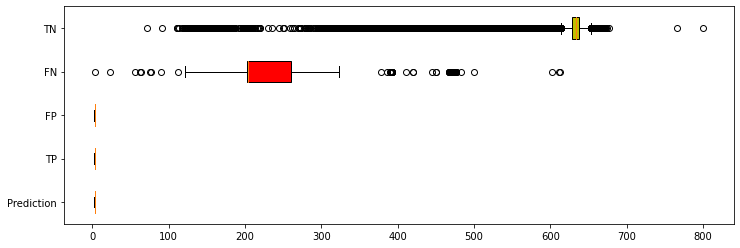

Anomalies: 14484
Anomalies by Algorithm : 214580
% Anomalies detected: 60.37%
False Positive Rate: 0.07
False Negative Rate: 39.63
Accuracy: 97.33
F1 Score: 74.82
Recall: 60.37
Precision: 98.37

[[205691    145]
 [  5740   8744]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    205836
           1       0.98      0.60      0.75     14484

    accuracy                           0.97    220320
   macro avg       0.98      0.80      0.87    220320
weighted avg       0.97      0.97      0.97    220320

--------------------
Sensor: sensor_10


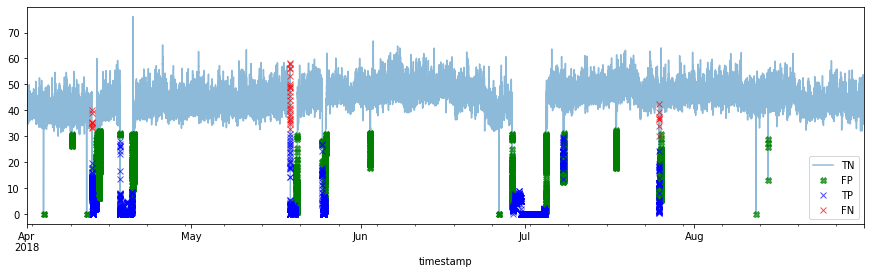

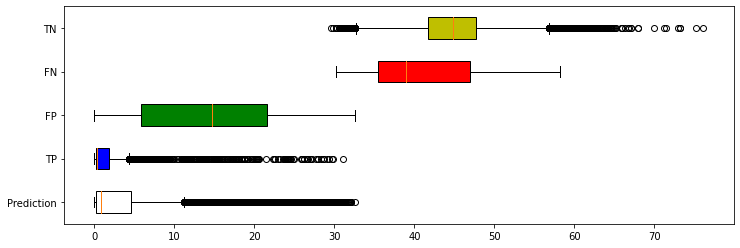

Anomalies: 14484
Anomalies by Algorithm : 220283
% Anomalies detected: 99.74%
False Positive Rate: 1.79
False Negative Rate: 0.26
Accuracy: 98.31
F1 Score: 88.59
Recall: 99.74
Precision: 79.68

[[202151   3685]
 [    37  14447]]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    205836
           1       0.80      1.00      0.89     14484

    accuracy                           0.98    220320
   macro avg       0.90      0.99      0.94    220320
weighted avg       0.99      0.98      0.98    220320

--------------------
Sensor: sensor_42


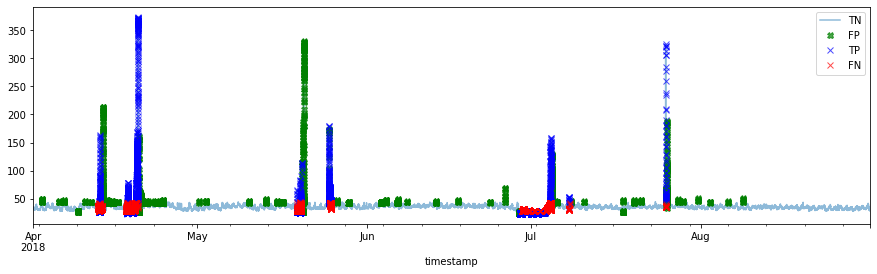

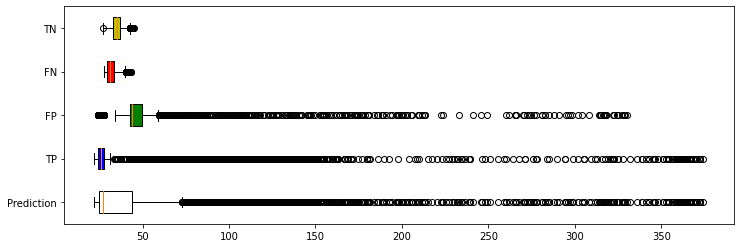

Anomalies: 14484
Anomalies by Algorithm : 214126
% Anomalies detected: 57.24%
False Positive Rate: 1.27
False Negative Rate: 42.76
Accuracy: 96.0
F1 Score: 65.3
Recall: 57.24
Precision: 76.0

[[203218   2618]
 [  6194   8290]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    205836
           1       0.76      0.57      0.65     14484

    accuracy                           0.96    220320
   macro avg       0.87      0.78      0.82    220320
weighted avg       0.96      0.96      0.96    220320

--------------------
Sensor: sensor_49


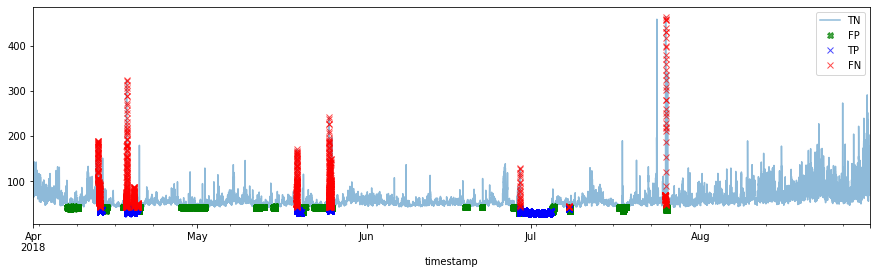

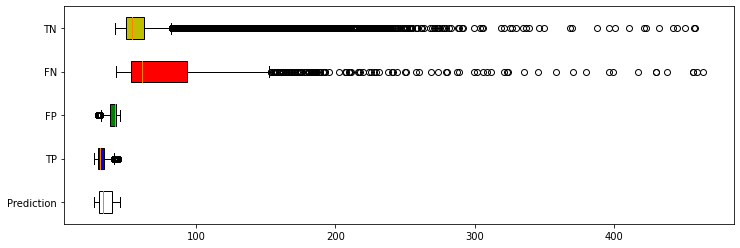

Anomalies: 14484
Anomalies by Algorithm : 218964
% Anomalies detected: 90.64%
False Positive Rate: 3.33
False Negative Rate: 9.36
Accuracy: 96.27
F1 Score: 76.18
Recall: 90.64
Precision: 65.7

[[198982   6854]
 [  1356  13128]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    205836
           1       0.66      0.91      0.76     14484

    accuracy                           0.96    220320
   macro avg       0.83      0.94      0.87    220320
weighted avg       0.97      0.96      0.97    220320

--------------------


In [10]:
import numpy as np
import pandas as pd

sensors = ["sensor_00","sensor_01", "sensor_02", 
           "sensor_04", "sensor_10",
           "sensor_42", "sensor_49"]

metrics = []
for sensor in sensors:
    
    print("Sensor: {}".format(sensor))
    
    #predict anoalies
    outlier_label, normal_label, y_predicted = gaussian_hmm(data_df_encod, sensor)
    
    #filter results and plot predictions
    anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN = detection_anomalies(data_df_encod, 
                                                                   outlier_label, 
                                                                   normal_label, 
                                                                   sensor,
                                                                   y_predicted)
    
    #apply metrics
    results = results_metrics(outlier_label, normal_label, sensor, data_df_encod, 
                              y_predicted, anomalies_FP, 
                              anomalies_TP, anomalies_FN, 
                              anomalies_TN)
    results['sensor'] = sensor
    metrics.append(results)
    print("-"*20)
    

In [12]:
#Cluster 5
data = pd.DataFrame(metrics)
data["Method"] = "gaussian_hmm"

data = data[ ['sensor'] + [ col for col in data.columns if col != 'sensor' ] ]
data = data[["sensor", "Method", "Accuracy", "F1", "Recall", "Precision", "FNR", "FPR"]]

data

,sensor,Method,Accuracy,F1,Recall,Precision,FNR,FPR
0,sensor_00,gaussian_hmm,98.89,92.21,99.74,85.73,0.26,1.17
1,sensor_01,gaussian_hmm,96.15,73.35,80.61,67.29,19.39,2.76
2,sensor_02,gaussian_hmm,95.19,71.41,91.31,58.63,8.69,4.53
3,sensor_04,gaussian_hmm,97.33,74.82,60.37,98.37,39.63,0.07
4,sensor_10,gaussian_hmm,98.31,88.59,99.74,79.68,0.26,1.79
5,sensor_42,gaussian_hmm,96.00,65.30,57.24,76.00,42.76,1.27
6,sensor_49,gaussian_hmm,96.27,76.18,90.64,65.70,9.36,3.33


In [13]:
data.to_csv("./results/hmm_results")

In [14]:
from utils.style_results import *

columns = ["sensor","Accuracy", "Precision", "Recall", "F1"]
columns_n = ["FNR", "FPR"]
result_t = data.style.applymap(style_positive, props='color:white;background-color:green', subset=columns)\
            .applymap(style_medium, props='color:black;background-color:lightgreen', subset=columns)\
            .applymap(style_negative, props='color:black;background-color:red', subset=columns)\
            .applymap(style_positive_n, props='color:white;background-color:green', subset=columns_n)\
            .applymap(style_medium_n, props='color:black;background-color:lightgreen', subset=columns_n)\
            .applymap(style_negative_n, props='color:black;background-color:red', subset=columns_n)

result_t

,sensor,Method,Accuracy,F1,Recall,Precision,FNR,FPR
0,sensor_00,gaussian_hmm,98.890000,92.210000,99.740000,85.730000,0.260000,1.170000
1,sensor_01,gaussian_hmm,96.150000,73.350000,80.610000,67.290000,19.390000,2.760000
2,sensor_02,gaussian_hmm,95.190000,71.410000,91.310000,58.630000,8.690000,4.530000
3,sensor_04,gaussian_hmm,97.330000,74.820000,60.370000,98.370000,39.630000,0.070000
4,sensor_10,gaussian_hmm,98.310000,88.590000,99.740000,79.680000,0.260000,1.790000
5,sensor_42,gaussian_hmm,96.000000,65.300000,57.240000,76.000000,42.760000,1.270000
6,sensor_49,gaussian_hmm,96.270000,76.180000,90.640000,65.700000,9.360000,3.330000
